# Part I - Ford GoBike System Data Exploration
## by Eng. Raghad Shalabi

## Introduction
Introduce the Ford GoBike dataset. This dataset contains information about individual bike rides made in a bike-sharing system covering the greater San Francisco Bay Area. The goal is to explore the data, identify key features, and perform a detailed analysis to uncover insights about the usage patterns of the bike-sharing system.

## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load in the dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv')

# Display basic information about the dataset
df.info()

# Display the first few rows of the dataset
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:20:44.0740   

   start_station_id                                start_station_name  \
0              21.0  Montgomery St BART Station (Market St at 2nd St)   
1              23.0                     The Embarcadero at Steuart St   
2              86.0                           Market St at Dolores St   
3             375.0                           Grove St at Masonic Ave   
4               7.0                               Frank H Ogawa Plaza   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.789625              -122.400811            13.0   
1               37.791464              -122.391034            81.0   
2               37.769305              -122.426826             3.0   
3               37.774836              -122.446546            70.0   
4               37.804562              -122.271738           222.0   

                               end_station_name  end_station_latitude  \
0                Commercial St at Montgomery St             37.794231   
1                            Berry St at 4th St             37.775880   
2  Powell St BART Station (Market St at 4th St)             37.786375   
3                        Central Ave at Fell St             37.773311   
4                         10th Ave at E 15th St             37.792714   

   end_station_longitude  bike_id   user_type  member_birth_year  \
0            -122.402923     4902    Customer             1984.0   
1            -122.393170     2535    Customer                NaN   
2            -122.404904     5905    Customer             1972.0   
3            -122.444293     6638  Subscriber             1989.0   
4            -122.248780     4898  Subscriber             1974.0   

  member_gender bike_share_for_all_trip  
0          Male                      No  
1           NaN                      No  
2          Male                      No  
3         Other                      No  
4          Male                     Yes

In [3]:
# Describe the dataset
df.describe()

duration_sec  start_station_id  start_station_latitude  \
count  183412.000000     183215.000000           183412.000000   
mean      726.078435        138.590427               37.771223   
std      1794.389780        111.778864                0.099581   
min        61.000000          3.000000               37.317298   
25%       325.000000         47.000000               37.770083   
50%       514.000000        104.000000               37.780760   
75%       796.000000        239.000000               37.797280   
max     85444.000000        398.000000               37.880222   

       start_station_longitude  end_station_id  end_station_latitude  \
count            183412.000000   183215.000000         183412.000000   
mean               -122.352664      136.249123             37.771427   
std                   0.117097      111.515131              0.099490   
min                -122.453704        3.000000             37.317298   
25%                -122.412408       44.000000             37.770407   
50%                -122.398285      100.000000             37.781010   
75%                -122.286533      235.000000             37.797320   
max                -121.874119      398.000000             37.880222   

       end_station_longitude        bike_id  member_birth_year  
count          183412.000000  183412.000000      175147.000000  
mean             -122.352250    4472.906375        1984.806437  
std                 0.116673    1664.383394          10.116689  
min              -122.453704      11.000000        1878.000000  
25%              -122.411726    3777.000000        1980.000000  
50%              -122.398279    4958.000000        1987.000000  
75%              -122.288045    5502.000000        1992.000000  
max              -121.874119    6645.000000        2001.000000

In [4]:
# Check the shape of the dataframe
df.shape

(183412, 16)

In [5]:
# Check for missing values
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [6]:
# Check for duplicated rows
df.duplicated().sum()

0

### What is the structure of your dataset?

> The dataset consists of 183,412 rows and 16 columns, with features including trip duration, start and end station information, user type, and more.


### What is/are the main feature(s) of interest in your dataset?

> The main features of interest can include duration, start and end stations, and user type.


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Features such as start time, end time, user type, and station locations will help support the investigation.

## Univariate Exploration

#### 1. Histogram: Distribution of Trip Durations

In [7]:
def plot_histogram(data, column, bins, title, xlabel, ylabel, color='skyblue'):
    plt.figure(figsize=(10, 6))
    plt.hist(data[column], bins=bins, color=color)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

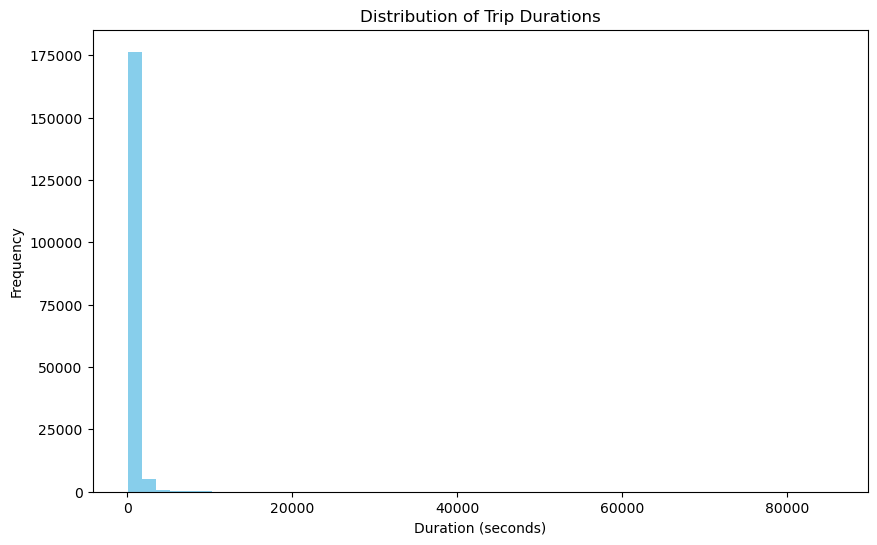

In [8]:
plot_histogram(df, 'duration_sec', 50, 'Distribution of Trip Durations', 'Duration (seconds)', 'Frequency')


Observation: The majority of trips have short durations, with a long tail representing fewer longer trips.

#### 2. Bar Chart: Count of User Types

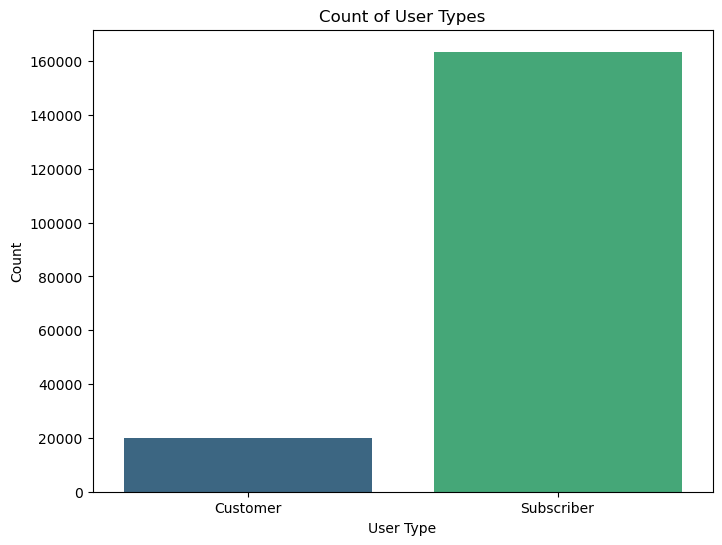

In [9]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='user_type', palette='viridis')
plt.title('Count of User Types')
plt.xlabel('User Type')
plt.ylabel('Count')
plt.show()

Observation: Most users are subscribers, with a smaller proportion being casual customers.

#### 3. Count Plot: Start Hour Distribution

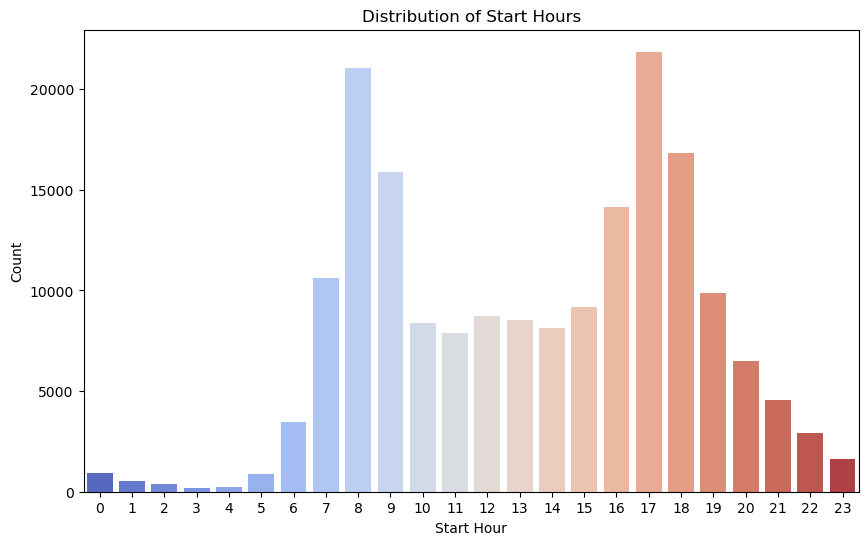

In [10]:
df['start_time'] = pd.to_datetime(df['start_time'])
df['start_hour'] = df['start_time'].dt.hour

plt.figure(figsize=(10, 6))
sns.countplot(x='start_hour', data=df, palette='coolwarm')
plt.title('Distribution of Start Hours')
plt.xlabel('Start Hour')
plt.ylabel('Count')
plt.show()

Observation: Trips are more frequent during the morning and evening rush hours.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The distribution of trip durations shows that most trips are short, with a long tail of longer trips. This is a typical pattern in transportation data where most trips are brief.

> The start hour distribution indicates that bike usage peaks during traditional commute hours, reflecting the utility of bike-sharing for daily commuting.

> No unusual points were found that required transformations in these univariate analyses.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> No unusual distributions were identified in the features of interest. The data appears consistent with expected patterns of bike-sharing usage.

> The start time was converted to datetime, and a new column start_hour was created to facilitate temporal analysis.

## Bivariate Exploration

#### 4. Scatterplot: Trip Duration vs Start Hour

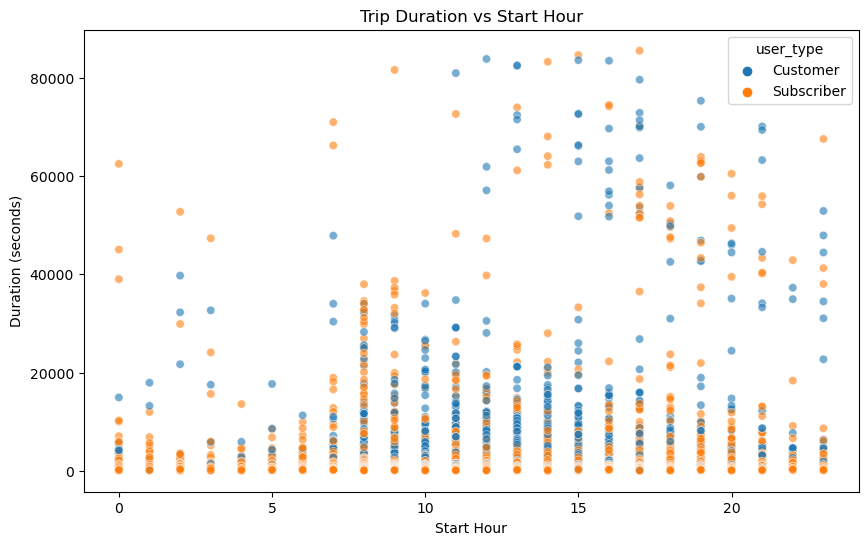

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='start_hour', y='duration_sec', data=df, hue='user_type', alpha=0.6)
plt.title('Trip Duration vs Start Hour')
plt.xlabel('Start Hour')
plt.ylabel('Duration (seconds)')
plt.show()

Observation: Longer trips occur more frequently during non-peak hours, with casual users often taking longer trips.



#### 5. Box Plot: Trip Duration by User Type

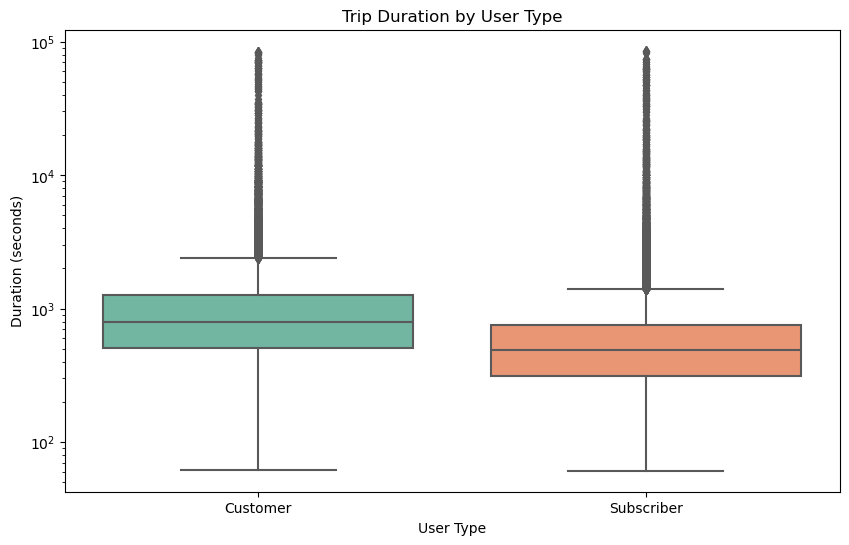

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='user_type', y='duration_sec', data=df, palette='Set2')
plt.title('Trip Duration by User Type')
plt.xlabel('User Type')
plt.ylabel('Duration (seconds)')
plt.yscale('log')  # Log scale to better visualize the data
plt.show()

Observation: Casual users tend to have more variability in trip duration, including longer trips.

#### 6. Heatmap: Correlation between Numerical Variables

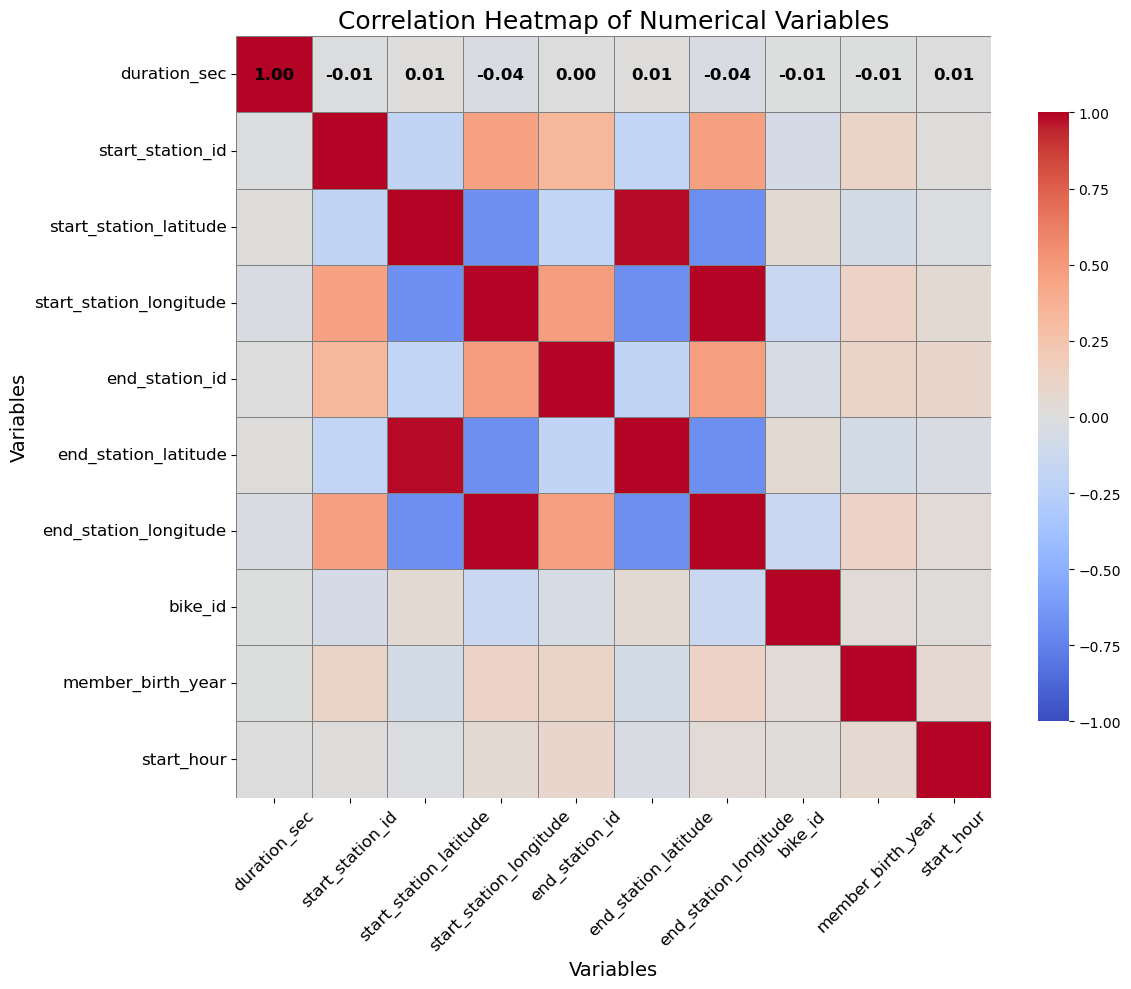

In [13]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr = numeric_df.corr()

# Plot the heatmap with improved clarity and value visibility
plt.figure(figsize=(12, 10))  # Larger figure size for better readability
heatmap = sns.heatmap(
    corr, 
    annot=True,  # Display correlation values
    cmap='coolwarm', 
    fmt='.2f',  # Format of the values
    vmin=-1, 
    vmax=1, 
    linewidths=0.5,  # Add lines between cells
    linecolor='gray',  # Color of the lines
    cbar_kws={"shrink": 0.8},  # Adjust color bar size
    annot_kws={"size": 12, "weight": 'bold', "color": 'black'},  # Font size, weight, and color for annotations
    xticklabels=corr.columns,  # Set x-tick labels
    yticklabels=corr.columns  # Set y-tick labels
)

# Improve plot aesthetics
plt.title('Correlation Heatmap of Numerical Variables', fontsize=18)
plt.xlabel('Variables', fontsize=14)
plt.ylabel('Variables', fontsize=14)
plt.xticks(fontsize=12, rotation=45)  # Rotate x-tick labels for readability
plt.yticks(fontsize=12)
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


Observation: There’s a low correlation between numerical variables, indicating that other factors may drive user behavior.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Trip Duration vs Start Hour: Longer trips are more common during off-peak hours, particularly among casual users.

> Trip Duration by User Type: Casual users exhibit more variability in trip duration, while subscribers tend to have more consistent trip lengths.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The correlation heatmap revealed generally low correlations among numerical variables, suggesting that trip duration, start time, and other numerical factors may be influenced by external factors not captured in the dataset.

## Multivariate Exploration

#### 7. Facet Plot: Trip Duration by User Type and Day of the Week



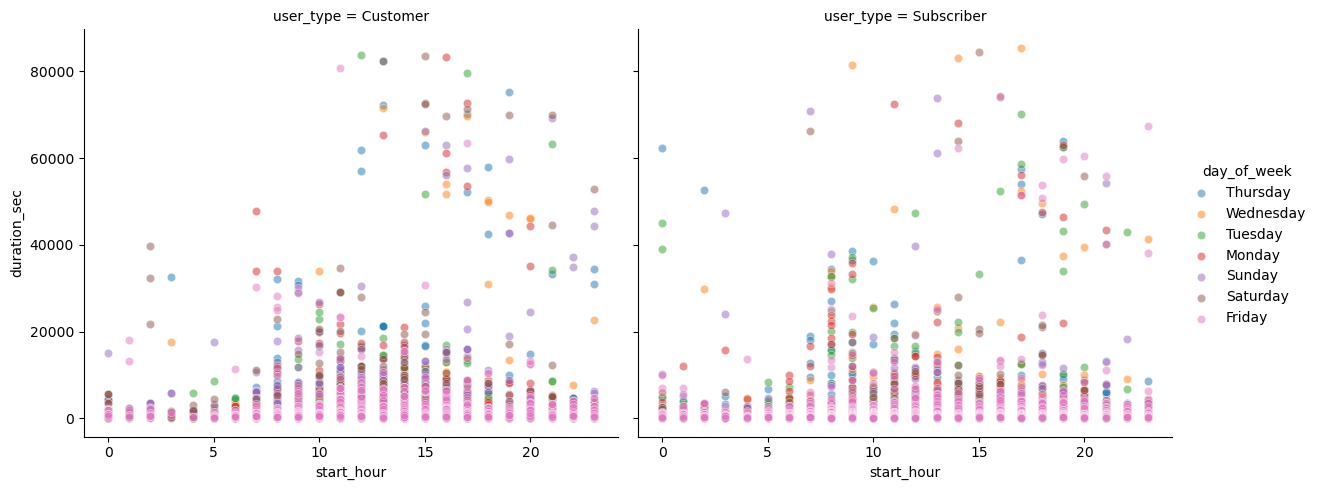

In [14]:
df['day_of_week'] = df['start_time'].dt.day_name()

g = sns.FacetGrid(df, col='user_type', hue='day_of_week', height=5, aspect=1.2, col_wrap=2)
g.map(sns.scatterplot, 'start_hour', 'duration_sec', alpha=0.5)
g.add_legend()
plt.show()

Observation: Casual users tend to take longer trips on weekends, while subscribers maintain shorter, consistent trip durations throughout the week.

#### 8. Pair Plot: Relationships Between Key Variables



D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf

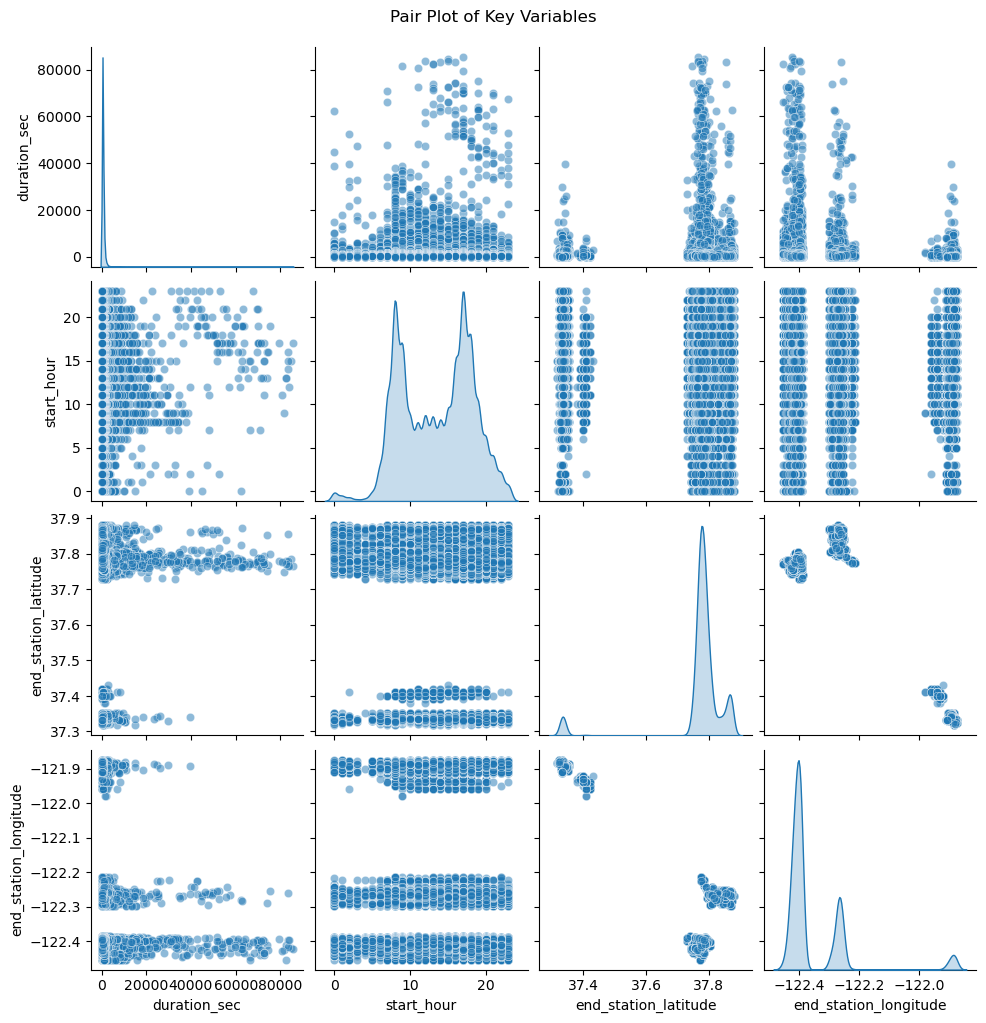

In [15]:

# Replace infinite values with NaN in the selected columns
df[['duration_sec', 'start_hour', 'end_station_latitude', 'end_station_longitude']] = df[['duration_sec', 'start_hour', 'end_station_latitude', 'end_station_longitude']].replace([np.inf, -np.inf], np.nan)

# Generate the pair plot
sns.pairplot(df[['duration_sec', 'start_hour', 'end_station_latitude', 'end_station_longitude']], diag_kind='kde', plot_kws={'alpha':0.5})
plt.suptitle('Pair Plot of Key Variables', y=1.02)
plt.show()

Observation: There is some spread in trip duration and distances, but no strong linear relationships between the variables.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Trip Duration by User Type and Day of the Week: Casual users tend to have longer trips during weekends, possibly indicating recreational use, while subscribers show more consistent trip durations regardless of the day.

> The pair plot didn’t reveal strong relationships between the key variables, suggesting that other factors might play a role in influencing trip duration and timing.

### Were there any interesting or surprising interactions between features?

> The consistency of trip durations among subscribers across different days suggests a routine usage pattern, likely for commuting purposes.

> The pair plot’s lack of strong relationships might suggest that trip duration and timing are influenced by a combination of other factors not directly captured in the dataset.

# Conclusions

### Summary of Findings
> **Univariate Exploration:** Most trips are short and occur during rush hours. The majority of users are subscribers.

> **Bivariate Exploration:** Casual users tend to take longer trips, especially outside peak hours. There is a wide range of trip durations across different times of the day.

> **Multivariate Exploration:** Casual users often take longer trips on weekends, while subscribers are more consistent in trip length regardless of the day.
